In [6]:
import torch
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_train=datasets.MNIST(root="./data/",
                         transform=transforms.ToTensor(),
                         train=True,
                         download=True)

data_test=datasets.MNIST(root="./data/",
                        transform=transforms.ToTensor(),
                        train=False)

In [8]:
tranform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

In [9]:
#数据装载
data_loader_train=torch.utils.data.DataLoader(dataset=data_train,batch_size=64,shuffle=True)
data_loader_test=torch.utils.data.DataLoader(dataset=data_train,batch_size=64,shuffle=True)

[tensor(5), tensor(0), tensor(0), tensor(3), tensor(5), tensor(1), tensor(9), tensor(1), tensor(0), tensor(1), tensor(9), tensor(8), tensor(4), tensor(5), tensor(8), tensor(6), tensor(1), tensor(0), tensor(0), tensor(0), tensor(5), tensor(6), tensor(0), tensor(8), tensor(5), tensor(9), tensor(8), tensor(5), tensor(7), tensor(8), tensor(7), tensor(4), tensor(9), tensor(3), tensor(2), tensor(1), tensor(1), tensor(1), tensor(6), tensor(2), tensor(4), tensor(2), tensor(8), tensor(3), tensor(6), tensor(6), tensor(4), tensor(6), tensor(7), tensor(7), tensor(2), tensor(2), tensor(3), tensor(0), tensor(1), tensor(0), tensor(7), tensor(6), tensor(6), tensor(2), tensor(6), tensor(2), tensor(0), tensor(6)]


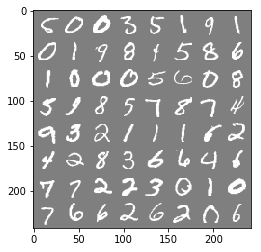

In [10]:
#数据预览
images,labels=next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std=[0.5,0.5,0.5]
mean=[0.5,0.5,0.5]
img=img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [11]:
#卷积神经网络模型搭建
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1=torch.nn.Sequential(
            torch.nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(stride=2,kernel_size=2))
        
        self.dense=torch.nn.Sequential(
            torch.nn.Linear(14*14*128,1024),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(1024,10))
    def forward(self,x):
        x=self.conv1(x)
        x=x.view(-1,14*14*128)
        x=self.dense(x)
        return x

In [12]:
model=Model()
cost=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [28]:
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [13]:
#模型训练和参数优化
n_epochs=5

for epoch in range(n_epochs):
    running_loss=0.0
    running_correct=0
    print("Epoch{}/{}".format(epoch,n_epochs))
    print("-"*10)
    for data in data_loader_train:
        X_train,y_train=data
        X_train,y_train=Variable(X_train),Variable(y_train)
        outputs=model(X_train)
        _,pred=torch.max(outputs.data,1)
        optimizer.zero_grad()
        loss=cost(outputs,y_train)
        
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        running_correct+=torch.sum(pred==y_train.data)
    testing_correct=0
    for data in data_loader_test:
        X_test,y_test=data
        X_test,y_test=Variable(X_test),Variable(y_test)
        outputs=model(X_test)
        _,pred=torch.max(outputs.data,1)
        testing_correct+=torch.sum(pred==y_test.data)
    print("Loss is:{:.4f},Train Accuracy is:{:.4f}%,Test Accuracy is:{:.4f}".format(running_loss/len(data_train),100*running_correct/len(data_train),100*testing_correct/len(data_test)))

Epoch0/5
----------
Loss is:0.0022,Train Accuracy is:95.0000%,Test Accuracy is:591.0000
Epoch1/5
----------
Loss is:0.0007,Train Accuracy is:98.0000%,Test Accuracy is:594.0000
Epoch2/5
----------
Loss is:0.0005,Train Accuracy is:99.0000%,Test Accuracy is:596.0000
Epoch3/5
----------
Loss is:0.0003,Train Accuracy is:99.0000%,Test Accuracy is:596.0000
Epoch4/5
----------
Loss is:0.0002,Train Accuracy is:99.0000%,Test Accuracy is:598.0000


Predict Label is: [tensor(9), tensor(9), tensor(1), tensor(1)]
Real Label is: [tensor(9), tensor(9), tensor(1), tensor(1)]


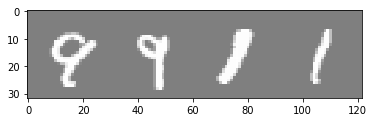

In [15]:
data_loader_test=torch.utils.data.DataLoader(dataset=data_test,
                                            batch_size=4,
                                            shuffle=True)

X_test,y_test=next(iter(data_loader_test))
inputs=Variable(X_test)
pred=model(inputs)
_,pred=torch.max(pred,1)

print("Predict Label is:",[i for i in pred.data])
print("Real Label is:",[i for i in y_test])

img=torchvision.utils.make_grid(X_test)
img=img.numpy().transpose(1,2,0)

std=[0.5,0.5,0.5]
mean=[0.5,0.5,0.5]
img=img*std+mean
plt.imshow(img)